In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('covid_toy.csv',usecols=['age','fever','has_covid'])

In [5]:
df.sample

<bound method NDFrame.sample of     age  fever has_covid
0    60  103.0        No
1    27  100.0       Yes
2    42  101.0        No
3    31   98.0        No
4    65  101.0        No
..  ...    ...       ...
95   12  104.0        No
96   51  101.0       Yes
97   20  101.0        No
98    5   98.0        No
99   10   98.0       Yes

[100 rows x 3 columns]>

In [6]:
df.fillna(df['fever'].mean(), inplace=True)

In [7]:
df.isnull().sum()

age          0
fever        0
has_covid    0
dtype: int64

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [31]:
def apply_transform(transform):
    x = df.drop(columns=['has_covid'])
    y = df['has_covid']

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['fever','age'])
    ],remainder='passthrough')

    x_transf = trf.fit_transform(x)

    clf = DecisionTreeClassifier()

    print('accuracy', np.mean(cross_val_score(clf, x_transf, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    stats.probplot(x['fever'], dist='norm', plot=plt)
    plt.title('Before transformation')

    plt.subplot(122)
    stats.probplot(x_transf[:,0], dist='norm', plot=plt)
    plt.title('After tranformation')
    
    plt.show()

accuracy 0.55


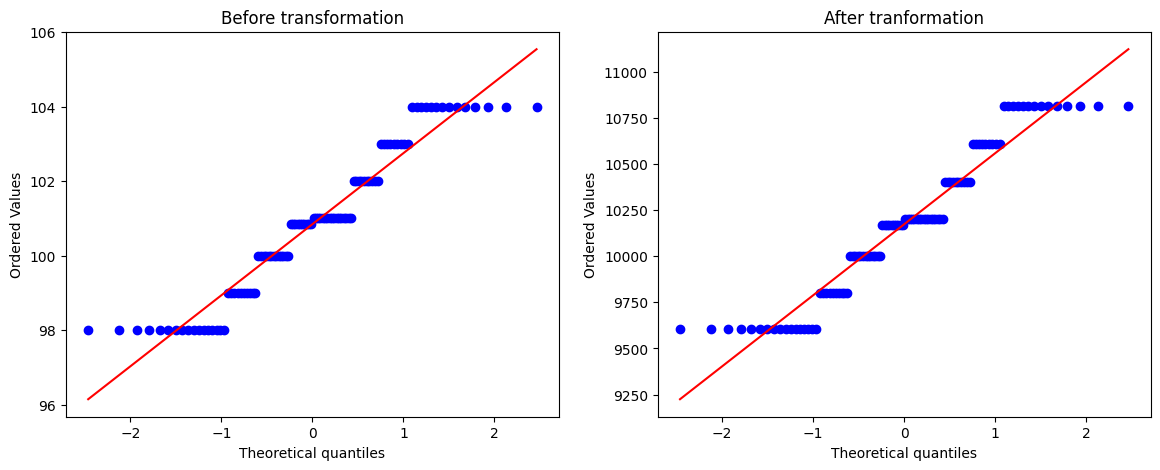

In [32]:
apply_transform(lambda x: x**2)